# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [3]:
df = pd.read_csv('advertising.csv')

# Data Reading

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Validation

<Axes: >

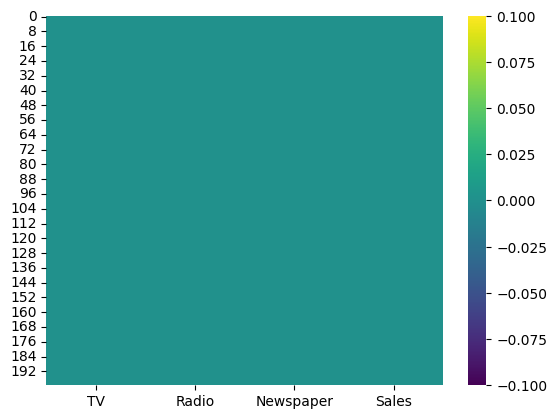

In [8]:
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Seems like there is no need to fix any missing data.

# EDA

<Axes: xlabel='TV'>

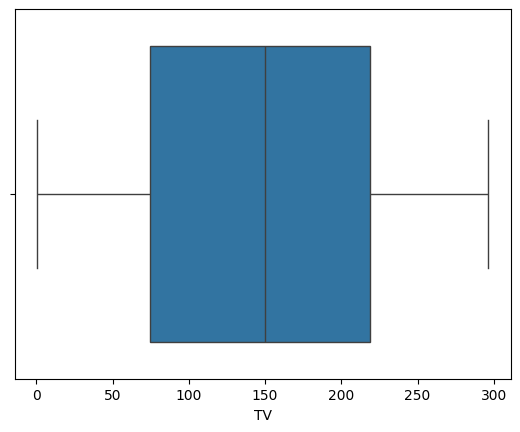

In [11]:
sns.boxplot(df,x='TV')

<Axes: xlabel='Radio'>

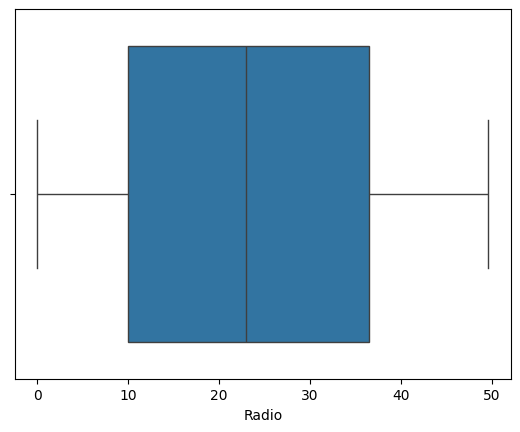

In [12]:
sns.boxplot(df,x='Radio')

<Axes: xlabel='Newspaper'>

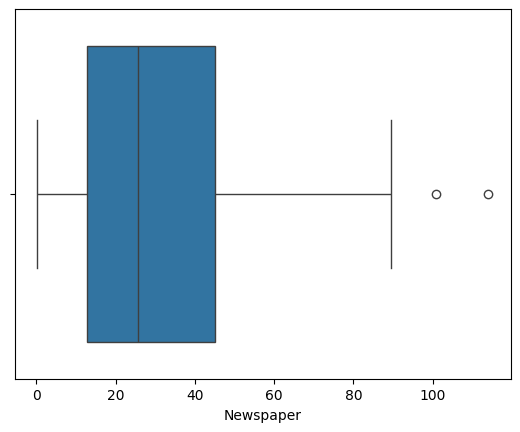

In [13]:
sns.boxplot(df,x='Newspaper')

<Axes: xlabel='Sales'>

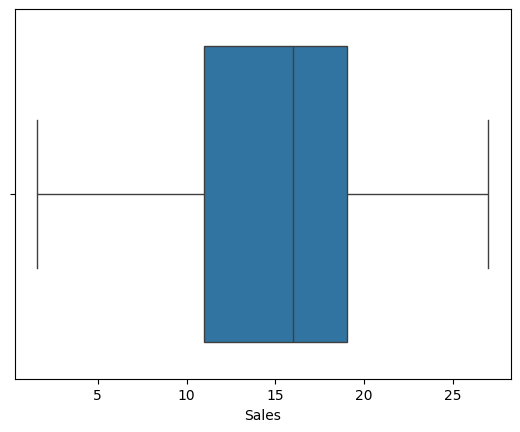

In [14]:
sns.boxplot(df,x='Sales')

There are no outlier in TV, Sales and Radio data. However there are outliers in Newspaper data. The average of sales is about 16000$.

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

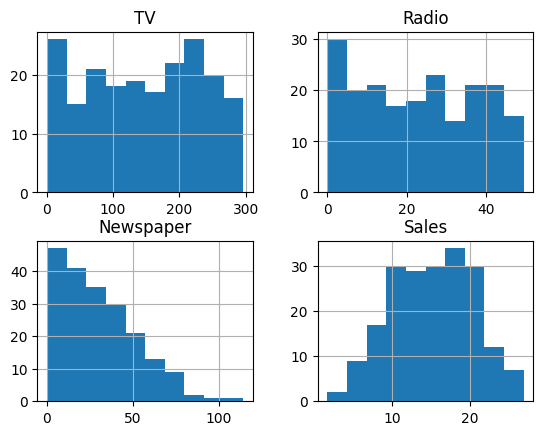

In [15]:
df.hist()

There is more budget spent on TV and Radio than Newspaper 

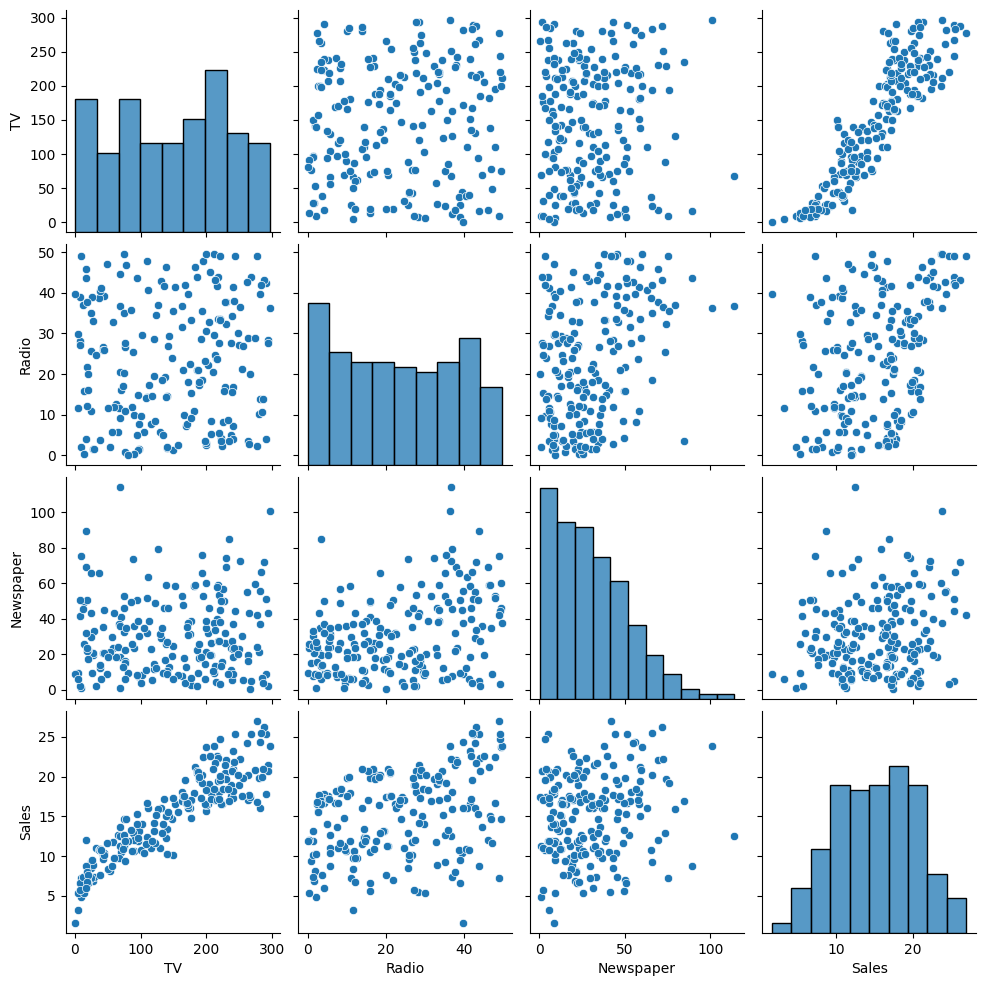

In [16]:
sns.pairplot(df)

<Axes: >

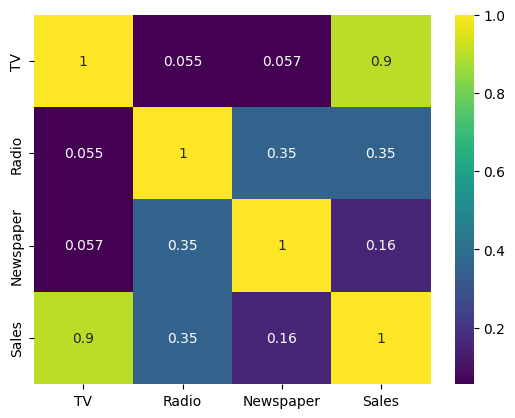

In [17]:
sns.heatmap(df.corr(),annot= True,cmap = 'viridis')

There is a strong correlation between Sales and TV Budget. However the same does not follow for Radio and Newspaper Budgets. However Radio Budget is a bit more correlated than Newspaper Budget. Makes sense why Newspaper Budget is less than others comparatively.

# Data Preprocessing

In [18]:
x = df.drop(columns=['Sales'])
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept= True)

In [21]:
lm.fit(x_train,y_train)

LinearRegression()

In [22]:
print("coeff :",lm.coef_)
print("Intercept : ", lm.intercept_)

coeff : [0.05358869 0.10270677 0.00793167]
Intercept :  4.743766701589683


# Model Prediction and Evaluation

In [24]:
y_pred = lm.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE :", mean_absolute_error(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 :",r2_score(y_test,y_pred))

MAE : 1.1594875061090586
MSE : 2.5416240362291473
RMSE : 1.594247169114359
R2 : 0.9091484341849799


# Tuning

In [31]:
import statsmodels.api as sm

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           8.13e-99
Time:                        10:23:23   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

The p-values of TV and Radio is almost 0. This indicates a very strong correlation between the coefficients and the variable Sales. However Newpaper has a high p-value of 0.954. It shows that for any level of signifiance the null hypothesis : There is a correlation between the dependant target variable Sales and independant variable, will be rejected for Newspaper. Hence it is not worth investing in Newspaper than we already do. The same can be said with t values which shows the standard deviations in stats. However if we do so the r2 score will decrease, but we will see a rise in the accuracy of the predictions.